In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import sklearn.model_selection as ms
import sklearn.tree as tree
import sklearn.metrics as met

# Import Dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All values are numerical, no enumeration needed.

# Visualization

### Correlation heatmap

<AxesSubplot:>

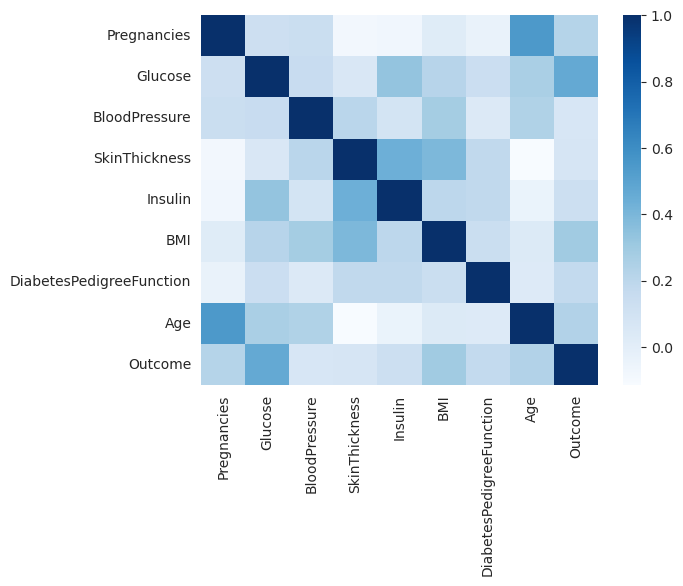

In [4]:
sea.heatmap(data.corr(), cmap="Blues")

### Frequency

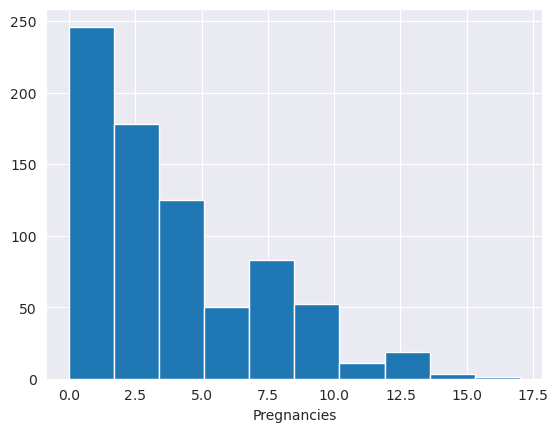

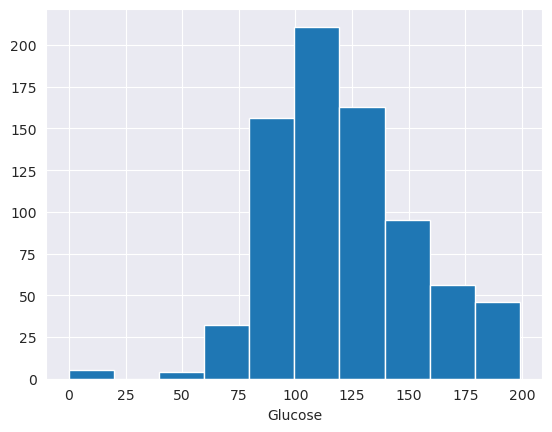

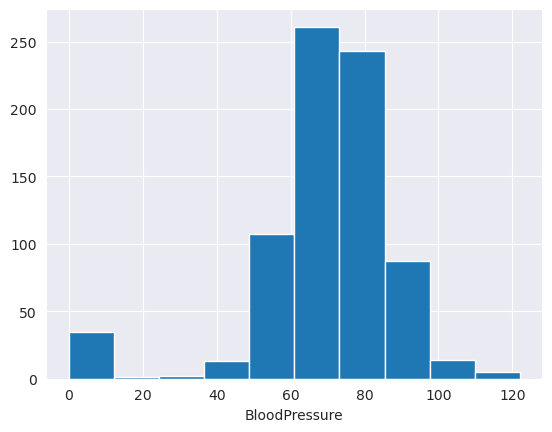

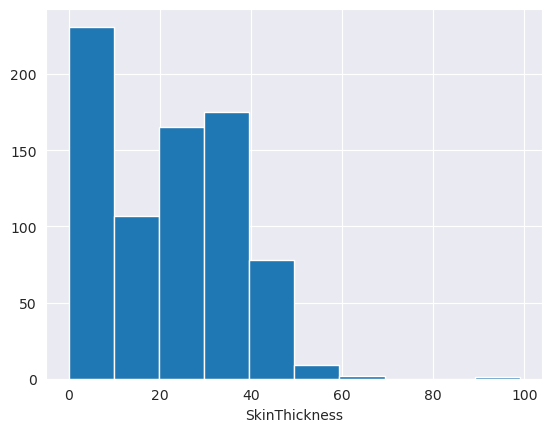

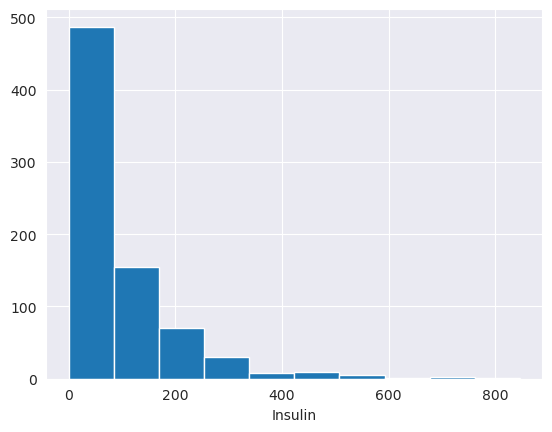

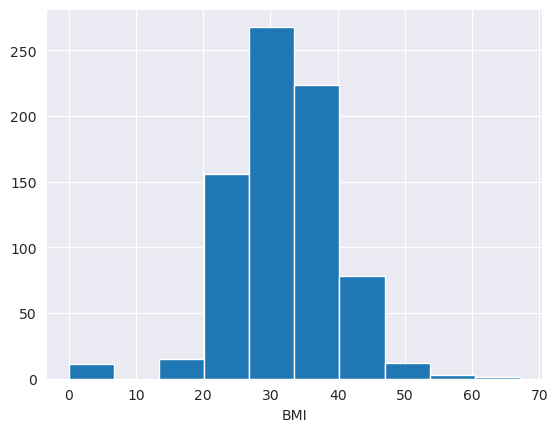

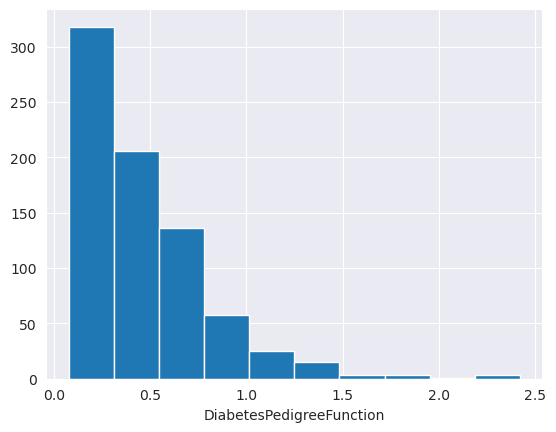

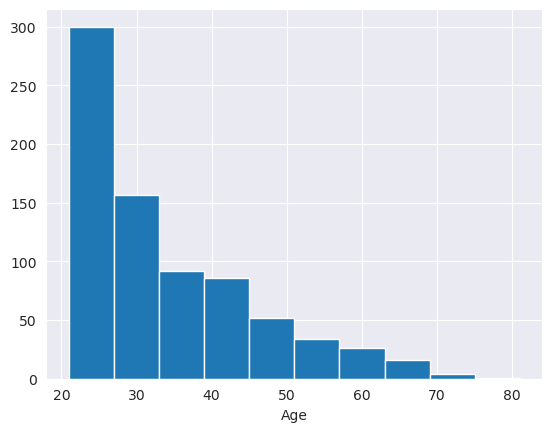

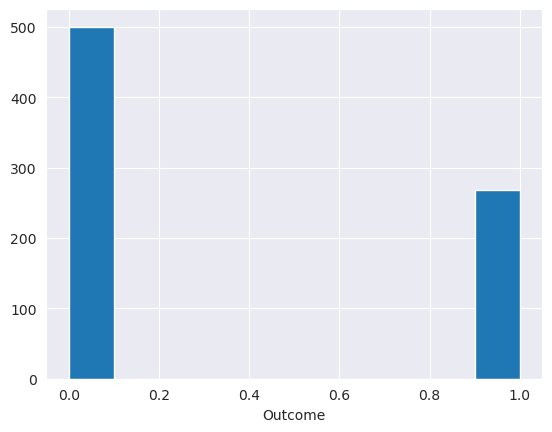

In [5]:
figure = plt.figure()
for col in data.columns:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()


# Prediction

In [6]:
info = data.drop(columns=['Outcome'])
results = data['Outcome']

### Decision tree

In [7]:
info_train, info_test, results_train, results_test = ms.train_test_split(info, results, test_size=0.25, random_state=1)

In [8]:
classifier = tree.DecisionTreeClassifier().fit(info_train,results_train)

In [9]:
prediction = classifier.predict(info_test)

<AxesSubplot:>

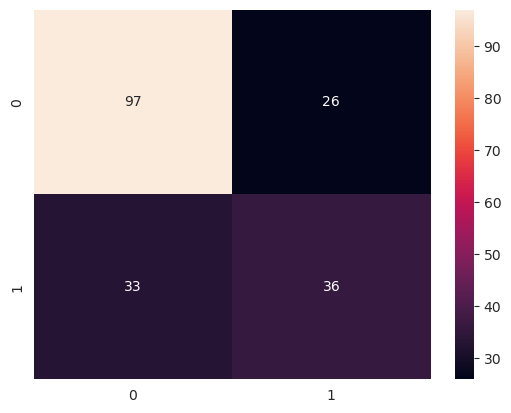

In [10]:
confusion = met.confusion_matrix(results_test,prediction)
sea.heatmap(confusion, annot=True)